### 문서 자동화

워드 문서 자동화     
• python-docx 모듈   
• Document객체.add_paragraph()로 문단을 추가, 스타일(제목, 헤딩 등에) 지정     
• Document객체.add_heading()   

https://python-docx.readthedocs.io/en/latest/ 참고하기

In [11]:
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_PARAGRAPH
from docx.shared import Mm

doc = Document()  #document = 문서

p = doc.add_heading('왕방산 국제 MTB대회', 0)  #제목 추가
#본문은 add_paragraphs()함수를 이용해 입력해 준다.
#이후 같은 paragraphs에 입력을 원할경우 add_run() 함수를 사용한다.
p = doc.add_paragraph('왕방산에 만들어진 산악자전거 도로를 돌아보는자전거 경주대회인 ', style='Normal')
p.add_run('‘왕방산 국제 MTB대회’').bold = True
p.add_run('는 명실상부한 최고의 산악자전거 대회로 자리매김하였습니다.')
p.add_run('천혜의 자연경관').italic = True
p.add_run('과 함께 왕방산의 정취를 느껴보시기 바랍니다.')
          
doc.add_heading('대회소개', level=1)
doc.add_paragraph('접수처: 대한자전거연맹', style='List Bullet')
doc.add_paragraph('문의사항: 문의사항 : ☎02-420-4247', style= 'List Bullet')

my_image = doc.add_picture('./1.png', width=Mm(100))  #사진추가, width=가로길이
last_paragraph = doc.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER  #중앙정렬 한다는 것

doc.add_page_break()  #페이지 끊고 다음 페이지로

my_image = doc.add_picture('./2.png', width=Mm(100))
last_paragraph = doc.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

records = (
('XC10', '690,000', '14.5kg'),
('XC20', '790,000', '13.5kg'),
('XC30', '890,000', '14.5kg')
)

table = doc.add_table(rows=1, cols=3)  #테이블 표 생성, 1행 3열
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells  #첫 행의 모든 셀 반환
hdr_cells[0].text = '모델명'  #1번째 셀
hdr_cells[0].paragraphs[0].runs[0].font.bold = True
hdr_cells[1].text = '가격'   #2번째 셀(행)
hdr_cells[1].paragraphs[0].runs[0].font.bold = True
hdr_cells[2].text = '무게'   #3번째 셀(행)
hdr_cells[2].paragraphs[0].runs[0].font.bold = True

for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)  #1번째 셀에 qty들어감
    row_cells[1].text = id
    row_cells[2].text = desc

doc.save('demo1.docx')  #문서 저장

#표 정렬 코드 예시
from docx.enum.table import WD_ALIGN_PARAGRAPH

table = doc.add_table(3,3)
table.cell(0, 0).vertical_alignment = WD_ALIGN_VERTICAL.CENTER

table.alignment = WD_TABLE_ALIGNMENT.CENTER

문서 자동화  
• os.startfile(출력파일, “print”) - 두번째 인수 print는 가상 프린터가 아닌 실제 기본 프린트로 문서를 출력

In [1]:
import os

#getcwd = 현재 작업 경로를 얻음
template_file = os.path.join(os.getcwd(), "demo1.docx") # 문서 파일 경로
os.startfile(template_file, "print")  #print는 진짜 프린터기로 출력하는 것

문서 자동화 - 워드를 PDF 문서로 저장   
• pywin32 모듈

In [3]:
import os
from win32com.client import Dispatch

wordapp = Dispatch("Word.Application")   #word프로그램을 실행시킴

fpath = os.path.join(os.getcwd(), "demo1.docx") # 파일 경로
myDoc = wordapp.Documents.Open(FileName=fpath)  #워드문서를 documents객체로 반환

pdf_path = os.path.join(os.getcwd(), "test_saved.pdf") # PDF로 저장
myDoc.SaveAs(pdf_path, FileFormat=17)  #SaveAs = 다른이름으로 저장

myDoc.Close()
wordapp.Quit()

문서 자동화 - PDF 문서에 암호 넣기   
• PyPDF2 모듈 - PDF에 암호 넣는 기능 지워, 한굴이 포함된 경우는 UnicodeEncodeError 발생     
• qpdf 라이브러리 - https://sourceforge.net/projects/qpdf/    
• qpdf.exe --encrypt 패스워드 패스워드 128 -- 원본파일.pdf 암호적용파일.pdf (명령 형식, 패스워드 두번 반복)

In [12]:
from subprocess import Popen

pdf_without_pass = "test_saved.pdf"  #암호없이 문서명 지정
pdf_with_pass = "test_saved2.pdf"  #암호 생성, 문서명 지정
password = "1234"  #비밀번호


#qpdf-10.3.1= 실행도구(qpdf 라이브러리 url에서 다운받아야 함), bin파일 아래, 암호 기본 방식 128
#test_saved.pdf 파일만 있으면 test_saved2가 암호걸린 상태로 만들어짐
Popen(r"qpdf-10.3.1\bin\qpdf.exe --encrypt {0} {0} 128 -- {1} {2}".format(
password, pdf_without_pass, pdf_with_pass).split())

PDF 문서 다루기 - 웹 페이지를 PDF로 저장  
• pdfkit 모듈 - https://pypi.org/project/pdfkit  
• wkhtmltopdf 모듈 - https://wkhtmltopdf.org/  

https://wkhtmltopdf.org/ 라이브러리 다운받기

html문서 pdf로 변환  
pdfkit 모듈은 wkhtmltopdf 유틸리티를 사용해서 웹 페이지 또는 저장된 HTML문서를 PDF로 변환  
wkhtmltopdf 설치, 실행 프로그램 경로를 config에 지정함  
pdfkit모듈의 from_url(), from_string(), from_file() 함수들로 변환  

option quiet은 wkhtmltopdf 실행 결과를 화면에 출력하지 않고 변환하도록 하는 옵션   


In [4]:
import pdfkit

options = {'quiet': ''} # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')

#url or html or string을 pdf로 변환, configuration= 구성 , config=설정값
#pdfkit.from_url('http://naver.com', 'naver.pdf', options=options, configuration=config)
#pdfkit.from_string('Hello!', 'string.pdf', options=options, configuration=config)
pdfkit.from_file('test.html', 'html.pdf', options=options, configuration=config)

True

In [ ]:
PDF 문서 다루기 - 웹 페이지를 PDF로 저장  
• 여러 웹페이지 혹은 파일을 하나의 pdf로 만들기 위해서는 소스 파일들을 리스트에 묶어서 전달


오류가 날 경우 이유  
1. 웹 서버에 요청 > connection문제 발생 가능성 있음    
2. welcome 페이지(main.html, index.html) 로드(client브라우저로 download)> network속도 문제 발생 가능성
3. html파싱, 메모리에 dom tree생성, 레더링된 결과 > 오류발생 가능성 
4. pdf문서로 변환

In [17]:
import pdfkit

options = {'quiet': ''} # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')
pdfkit.from_url(['http://naver.com', 'http://google.com'], 'naver_google.pdf', options=options, configuration=config)
# pdfkit.from_file(['data/test.html', 'data/test2.html'], 'out/out5.pdf', options=options, configuration=config)

True

PDF 문서 다루기 - 엑셀 문서를 PDF로 저장   
• 워드 문서를 win32를 이용하여 읽어 온 후 PDF 형식으로 저장,    
워크북의 ExportAsFixedFormat()

In [8]:
import os
from win32com.client import Dispatch

excelApp = Dispatch("Excel.Application") # 엑셀 시작
excelApp.Visible = False

fpath = os.path.abspath('sales_per_region.xlsx') # 읽어오기
workbook = excelApp.Workbooks.Open(fpath)

fpath = os.path.abspath('sample1.pdf') # pdf 포맷으로 저장하기
workbook.ExportAsFixedFormat(0, fpath) # xlTypePDF : 0

workbook.Close()
excelApp.Quit()

PDF 문서 다루기 - PPT 문서를 PDF로 저장  
• PPT객체의 SaveAs()의 두번째 인수에 32 전달

In [4]:
import os
from win32com.client import Dispatch

PPTApplication = Dispatch("PowerPoint.Application") # 엑셀 시작
PPTApplication.Visible = True

fpath = os.path.abspath('벚꽃이조 최종(1).pptx') # 읽어오기
ppt = PPTApplication.Presentations.Open(fpath)

fpath = os.path.abspath('벚꽃이조 최종(1)_ppt.pdf') # pdf 포맷으로 저장하기
ppt.SaveAs(fpath, 32) # ppSaveAsPDF

ppt.Close()
PPTApplication.Quit()

PDF 문서 다루기 - 이미지 파일을 PDF로 저장  
• PPT객체의 SaveAs()의 두번째 인수에 32 전달

In [7]:
! pip install reportlab

In [2]:
import glob
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from PIL import Image
flist = glob.glob('cartoon/*.jfif') # 이미지 파일 목록을 가져오기, 이미지가 있는 폴더로 경로 변경
pgsize = A4 # 용지 설정
c = canvas.Canvas('cartoon.pdf', pagesize=pgsize) # 파일 저장을 위한 Canvas 객체 생성 출력 파일, 페이지 크기 변경
w2 = pgsize[0] # 용지의 폭
for fpath in flist:
    im = Image.open(fpath) # 이미지를 읽는다
    w, h = im.size # 가로, 세로 이미지 크기를 가져온다
    r = w / h # 가로, 세로 비를 계산한다
    h2 = w2 / r # 용지 폭에 맞추어 높이를 계산한다(비율 유지)
    c.drawImage(fpath, 0, 0, w2, h2) # 이미지를 페이지에 그린다 
    c.showPage() # 한 페이지 정리하고 다음 페이지로 넘어간다
c.save()

PDF 문서 다루기 - 여러 PDF 파일 하나로 합치기  
• PPT객체의 SaveAs()의 두번째 인수에 32 전달

In [18]:
! pip install PyPDF2

  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61087 sha256=4f4223855654196fd82335b4fe5f1c4af509cda5732b06b05edc4740ccc6ef41
  Stored in directory: c:\users\fbvl\appdata\local\pip\cache\wheels\b1\1a\8f\a4c34be976825a2f7948d0fa40907598d69834f8ab5889de11
Successfully built PyPDF2


In [20]:
from PyPDF2 import PdfFileMerger, PdfFileReader

filenames = glob.glob('/*.pdf')  #현 디렉토리에서 .pdf 파일들을 모두 지정

merger = PdfFileMerger()
for filename in filenames:  #위 지정한 pdf파일들을 하나로 합침
    merger.append(PdfFileReader(open(filename,'rb')),import_bookmarks=False)
    merger.write("one_book.pdf")

PDF 문서 다루기 – 하나의 PDF파일을 여러 PDF 파일 하나로 분리하기   
• PdfFileReader.getPage(i)    
• PdfFileWriter.addPage()

In [25]:
from PyPDF2 import PdfFileMerger, PdfFileReader, PdfFileWriter

inputpdf = PdfFileReader(open("one_book.pdf", "rb"))

parts = [(0, 4), (3, 7)]  #페이지수를 할당
for k, (start, end) in enumerate(parts):  #페이지 파트를 분리
    end = min(end, inputpdf.numPages)
    output = PdfFileWriter()
    for i in range(start, end):
        output.addPage(inputpdf.getPage(i))

    with open("splitbook_%s.pdf" % k, "wb") as outputStream:
        output.write(outputStream)

PDF 문서 다루기 – PDF문서의 일부 페이지 제거   
• pikepdf 모듈    
• 페이지를 제거할 때 페이지 번호가 높은 것부터 낮은 순서대로 제거해야 한다     (앞쪽의 페이지 하나를 제거하면 페이지가 밀려서 페이지 번호가 하나씩 줄어듬)

In [28]:
! pip install pikepdf

In [29]:
import pikepdf

with pikepdf.open('one_book.pdf') as pdf:
    num_pages = len(pdf.pages)
    pages_to_delete = [2, 4, 6, num_pages-1] # 첫 페이지는 0 부터 시작한다
    for pg in sorted(pages_to_delete, reverse=True): # 역으로 제거해야 한다
        del pdf.pages[pg]
    pdf.save('one_book_deleted_pages.pdf')

PDF 문서 다루기 – PDF 페이지 회전   
• pikepdf 모듈   
• Pages의 Rotate 속성값으로 페이지 방향을 변경할 수 있다   
• 시계방향으로 90, 180, 270eh가 유효한 값들이다.

In [30]:
import pikepdf

my_pdf = pikepdf.Pdf.open('sample_book.pdf')
num_pages = len(my_pdf.pages)
#페이지는 0부터시작하기에 num_pages-1이걸 넣어주어야 함
pages_to_rotate = [0, 2, 4, 6, num_pages-1]  #해당 페이지만 회전된다
for pg in pages_to_rotate:
    my_pdf.pages[pg].Rotate = 90  #90도 회전
my_pdf.save('sample_book_rotated.pdf')

### PPT 자동화

PPT 문서 다루기 – 모든 레이아웃 적용해보기   
• python-pptx 라이브러리 : python-pptx.readthedocs.io/en/latest/   
• python-pptx 라이브러리 quick-start : python-pptx.readthedocs.io/en/latest/user/quickstart.html   참고하기      
• office테마에서 지원하는 11개의 레이아웃을 각 슬라이드에 적용    

In [ ]:
! pip install python-pptx

In [1]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

for i in range(0, 11):
    title_slide_layout = prs.slide_layouts[i] # 슬라이드 종류 선택
    slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가
    
prs.save('all_slides.pptx')

PPT 문서 다루기 – 레이아웃 별 placeholder 속성 확인   
• placeholder : 콘텐츠를 추가하는 것을 용이하게 함   
• 레이아웃에서 관리되고 있는 palceholder를 확인하고, 그에 맞게 정보를 추가하여 장표를 꾸밈

In [2]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

for i in range(0, 11): #placeholder의 index(순서)와 이름을 출력
    print("--------[%d] ------ "%(i))  #순서대로 숫자가 입력
    slide = prs.slides.add_slide(prs.slide_layouts[i])
    for shape in slide.placeholders:
        print('%d %s' % (shape.placeholder_format.idx, shape.name))

--------[0] ------ 
0 Title 1
1 Subtitle 2
--------[1] ------ 
0 Title 1
1 Content Placeholder 2
--------[2] ------ 
0 Title 1
1 Text Placeholder 2
--------[3] ------ 
0 Title 1
1 Content Placeholder 2
2 Content Placeholder 3
--------[4] ------ 
0 Title 1
1 Text Placeholder 2
2 Content Placeholder 3
3 Text Placeholder 4
4 Content Placeholder 5
--------[5] ------ 
0 Title 1
--------[6] ------ 
--------[7] ------ 
0 Title 1
1 Content Placeholder 2
2 Text Placeholder 3
--------[8] ------ 
0 Title 1
1 Picture Placeholder 2
2 Text Placeholder 3
--------[9] ------ 
0 Title 1
1 Vertical Text Placeholder 2
--------[10] ------ 
0 Vertical Title 1
1 Vertical Text Placeholder 2


In [4]:
from pptx import Presentation

prs = Presentation()
bullet_slide_layout = prs.slide_layouts[1]  #1 = 제목 + 내용슬라이드

slide = prs.slides.add_slide(bullet_slide_layout)  #1번 레이아웃 슬라이드추가
shapes = slide.shapes  #슬라이드 형태를 나타내는 것

title_shape = shapes.title  #타이틀 지정
body_shape = shapes.placeholders[1]  #placeholders[1]=부제목상자 추가

title_shape.text = '심세경'  #타이틀 텍스트 넣기

tf = body_shape.text_frame  #부제목에 텍스트 넣기
tf.text = '코딩 천재가 되서'

p = tf.add_paragraph()  #tf에 문단 추가
p.text = '다 풀어버릴거야'
p.level = 1   #level = 1 : 들여쓰기 레벨

p = tf.add_paragraph()
p.text = '아자아자'
p.level = 2

prs.save('심세경 미래.pptx')

In [5]:
from pptx import Presentation
from pptx.util import Inches, Pt

prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left = top = width = height = Inches(1)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

tf.text = "오늘은 공부 열심히 해보자"

p = tf.add_paragraph()
p.text = "내일의 내가 힘들지 않게"
p.font.bold = True

p = tf.add_paragraph()
p.text = "그래야 짱이 될 수 있어"
p.font.size = Pt(40)

prs.save('심세경 자서전.pptx')

PPT 문서 다루기 – 제목 슬라이드를 추가

In [6]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

title_slide_layout = prs.slide_layouts[0] # 0 : 제목슬라이드에 해당
slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가

title = slide.placeholders[0] # 제목 - 제목에 값넣기
title.text = "Hello, World!" # 제목에 값 넣기

subtitle = slide.placeholders[1] # 부제목 -제목상자는 placeholders[0], 부제목상자는 [1]
subtitle.text = "python-pptx was here!"

prs.save('test.pptx') # 저장

PPT 문서 다루기 – 제목 + 내용 슬라이드를 추가  
• add_paragraph() - 단락을 추가 , p.level로 들여 쓰기 레벨을 설정

In [7]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

bullet_slide_layout = prs.slide_layouts[1] # slide_layouts 1은 제목+내용 슬라이드를 의미
slide = prs.slides.add_slide(bullet_slide_layout) # 기존에 있던 슬라이드에 추가
title_shape = slide.placeholders[0] # 제목
title_shape.text = 'Adding a Bullet Slide'
body_shape = slide.placeholders[1] # 내용
tf = body_shape.text_frame
tf.text = 'Find the bullet slide layout'
p = tf.add_paragraph() # 단락 추가
p.text = 'Use _TextFrame.text for first bullet'
p.level = 1 # 1 : 들여쓰기 레벨
p = tf.add_paragraph() # 단락 추가
p.text = 'Use _TextFrame.add_paragraph() for subsequent bullets'
p.level = 2 # 2 : 들여쓰기 레벨
prs.save('test.pptx')

PPT 문서 다루기 – 사진 슬라이드를 추가   
• add_picture() - 이미지를 추가. 이미지의 경우 위치와 크기 설정이 필요. top, left는 시작점, width와 height는 이미지의 크기

In [8]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해
prs = Presentation() # 파워포인트 객체 선언

img_path = 'cartoon/풍경1.jfif'

blank_slide_layout = prs.slide_layouts[6] # 6 : 제목/내용이 없는 '빈' 슬라이드
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
width = height = Inches(1)
# width, hegith가 없을 경우 원본 사이즈로
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
left = Inches(3)
width = Inches(5.5)
height = Inches(4)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
prs.save('test2.pptx')

PPT 문서 다루기 – 표 슬라이드를 추가

In [9]:
prs = Presentation() # 파워포인트 객체 선언
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
shapes = slide.shapes
title_shape = slide.placeholders[0]
title_shape.text = 'Adding a Table'
rows = cols = 2
left = top = Inches(2.0)
width = Inches(6.0)
height = Inches(0.8)
table = shapes.add_table(rows, cols, left, top, width, height).table
# set column widths
table.columns[0].width = Inches(2.0)
table.columns[1].width = Inches(4.0)
# write column headings
table.cell(0, 0).text = 'Foo'
table.cell(0, 1).text = 'Bar'
# write body cells
table.cell(1, 0).text = 'Baz'
table.cell(1, 1).text = 'Qux'

excel 파일데이터를 이용해 units 데이터의 pivot 테이블 생성   
chart 생성   
ppt에 chart를 넣고 저장하기  

In [10]:
import pandas as pd

df = pd.read_excel('sample.xlsx', parse_dates=['Date'])
print(df.head())

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33


In [115]:
f = pd.pivot_table(df, index='Type',    # 행 위치에 들어갈 열
                     columns = 'Region',aggfunc = 'sum')
#print(f)
f2 = f['Units']

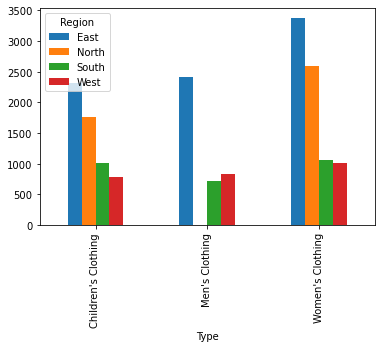

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

ax = f2.plot(kind='bar')
plt.savefig('graph.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

In [106]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해
prs = Presentation() # 파워포인트 객체 선언
img_path = 'graph.png'
blank_slide_layout = prs.slide_layouts[2] # 6 : 제목/내용이 없는 '빈' 슬라이드
slide = prs.slides.add_slide(blank_slide_layout)
#shapes = slide.shapes

title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = 'sales by account'
subtitle.text = 'Results consistent with last quarter'


left = Inches(3)
width = Inches(5.5)
height = Inches(4)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
prs.save('과제.pptx')

In [114]:
#다른방식으로 적기
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해
prs = Presentation() # 파워포인트 객체 선언
img_path = 'graph.png'
blank_slide_layout = prs.slide_layouts[2] # 6 : 제목/내용이 없는 '빈' 슬라이드
slide = prs.slides.add_slide(blank_slide_layout)
#shapes = slide.shapes
body_shape = slide.placeholders[1] # 내용
tf = body_shape.text_frame
p = tf.add_paragraph() # 단락 추가
tf.text = 'sales by account'
#p.text = 'sales by account'
tf.level = 1 # 1 : 들여쓰기 레벨
p = tf.add_paragraph() # 단락 추가
p.text =  'Results consistent with last quarter'
p.level = 2 # 2 : 들여쓰기 레벨
left = Inches(3)
width = Inches(5.5)
height = Inches(4)
top = Inches(0.1)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
prs.save('과제2.pptx')

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33
Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0


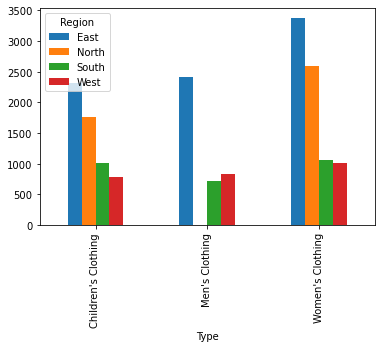

In [120]:
#정답코드
import pandas as pd
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

df = pd.read_excel('sample.xlsx', parse_dates=['Date'])
print(df.head())

#multi_index = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = 'sum')
#print(multi_index)
#multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = ['sum', len])
#print(multi_functions)

columns_example = pd.pivot_table(df, index='Type', columns = 'Region', values = 'Units', aggfunc = 'sum')
print(columns_example)

fig_plot = columns_example.plot(kind='bar')
fig = fig_plot.get_figure()
fig.savefig('report-image.png')

prs = Presentation() # 파워포인트 객체 선언
img_path = 'report-image.png'
blank_slide_layout = prs.slide_layouts[8] 
slide = prs.slides.add_slide(blank_slide_layout)
title = slide.shapes.title
title.text = 'sales by account'



placeholder = slide.placeholders[1] # 내용
pic = placeholder.insert_picture(img_path)

subtitle = slide.placeholders[2]
subtitle.text = 'Results consistent with last quarter'

prs.save('과제3.pptx')

파일 폴더 관리 자동화 – 연습문제 3  
• 필요 없는 파일 일괄 삭제 예] .bak 인 파일 삭제

In [ ]:
import os
import shutil
import time

target_dir = input("원하는 폴더를 입력하세요: ")
target_extension = input("제거하고싶은 확장자를 입력하세요: ")
filelist = os.listdir(target_dir)
target_file = [f for f in filelist if f.endswith(target_extension)]  #endswith=문자열에서 특정문자열로 끝나는 것
print(target_file)
for f in target_file:
    os.remove(target_dir + "\\" + f)
    print("제거한 파일 명:", f)

파일 폴더 관리 자동화 – 연습문제 4  
• 특정 문자열을 파일 이름에 포함하는 파일 목록 얻기 예] ‘python’ 문자열을 파일 이름에 포함하는 파일 목록 출력   
• 하위 디렉토리도 검색 대상이므로 os.walk() 이용

In [ ]:
# 특정 문자열을 파일 이름에 포함하는 파일 목록 얻기
import os
import shutil
from glob import glob
import pandas as pd

start_dir = input("시작 폴더를 입력하세요: ")
target_str = input("찾고싶은 문자열을 입력하세요: ")

result = pd.DataFrame(columns=["해당 디렉토리", "파일명"])  #변수만 미리 지정해놓기

#os.walk() 시작디렉토리부터 하위 디렉토리까지 파일 검색
for (curdir, dirs, files) in os.walk("."):
    lst = os.listdir(curdir)
    print(curdir)
    for l in lst:
        if l.find(target_str) != -1:
            result = result.append({"해당 디렉토리":curdir, "파일명":l}, ignore_index=True)

display(result)


In [ ]:
파일 폴더 관리 자동화 – 연습문제 5
• grep 기능을 활용해 특정 문자열을 포함한 파일 찾기
• mimetypes.guess_type() - 파일이 이진 파일인지 텍스트 파일인지 판단
• chardet.detect() - 어떤 인코딩으로 되어 있는지 판단
• 인코딩 정보를 이용해 문자열로 변환 -> 검색 문자열이 텍스트에 포함되어 있는지 판단

In [ ]:

# 파일 이름 일괄 변경 (예) py_a_a_1.txt => py_a_a_001.txt
from glob import glob
import os

if not os.path.exists('test'):
    os.mkdir('test') # test 폴더 생성
    
# test 폴더 내에 py_a_a_숫자.txt 형식의 파일 20개 생성
for k in range(20):
    fname = "test/py_a_a_{}.txt".format(k)
    # open(file_name, "w") - 파일 없으면 생성함
    open(fname, "w").write(fname + " testing...")
    print("creating..", fname)


In [124]:
import os
import shutil
import time
import mimetypes
import chardet

#mimetypes.guess_type() 텍스트 파일인지 여부 판단 가능 
#mimetype은 'type/subtype'
print(mimetypes.guess_type('test.py'))  #작업 디렉토리 아래, .png, xlsx
#text/...   text/html, text/plain, text/xml
#image/...
#application/...
#결과가  ('text/x-python', None) 이렇게 ㄴ나오는 이유는 파이썬임은 알지만 인코딩을 알 수 없어서

content = b'The asyncio package, ... is in the stdlib in Python 3.4 but not in 3'
print(content)
print(chardet.detect(content))  #어떤 인코딩인지 판단

result = str(content, 'ascii')   #문자열 변환
print(result)


search_str = 'Zen of Python'.lower()
flist = []
for curdir, dirs, files in os.walk(r'C:\ProgramData\Anaconda3\Lib\asyncio'):
    for fname in files:
        fpath = os.path.join(curdir, fname)
        mime = mimetypes.guess_type(fpath)
         #mime[0]은 mimetypes.guess_type를 하면 튜플로 (type, encoding)이런 형식으로 나와서 type만 보는 것
        if not mime[0] or not mime[0].startswith('text'): 
            continue
        content = open(fpath, 'rb').read()       # bytes로 읽어서
        encoding = chardet.detect(content)['encoding'] # 인코딩 테스트
        try:
            txt = str(content, encoding)  # str로 변환
        except:
            continue
        if search_Str in txt.lower():  #특정 문자열이 포함되었는지 테스트 하기
            print(fpath)
            flist.append(fpath)

('text/x-python', None)
b'The asyncio package, ... is in the stdlib in Python 3.4 but not in 3'
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
The asyncio package, ... is in the stdlib in Python 3.4 but not in 3
